In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import seaborn as sns
import pathlib
import statistics

In [2]:
font_size_plot = 26
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.size'] = font_size_plot

sns.set_style('whitegrid')

path = os.path.abspath('')
os.chdir(f'{path}')

In [3]:
transaction_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\Transactions.csv")
transaction_df['ScanDate'] = pd.to_datetime(transaction_df['ScanDate'],dayfirst=True)
print(transaction_df.head(10).to_string())

  Distributor                 ProductName            ProductSKU   ScanDate             UserId
0           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
1           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
2           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
3           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
4           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
5           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
6           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
7           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
8           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991
9           B  Mobil Super AIO - Charcoal  Mobil Super AIO -

In [4]:
transaction_to_datetime_df = pd.to_datetime(transaction_df['ScanDate'],dayfirst=True)
transaction_to_datetime_df = transaction_to_datetime_df.to_frame()
transaction_to_datetime_df['ScanDateYear'] = transaction_to_datetime_df['ScanDate'].dt.year
transaction_to_datetime_df['ScanDateMonth'] = transaction_to_datetime_df['ScanDate'].dt.month
transaction_to_datetime_df['ScanDateDay'] = transaction_to_datetime_df['ScanDate'].dt.day
print(transaction_to_datetime_df)

         ScanDate  ScanDateYear  ScanDateMonth  ScanDateDay
0      2023-11-29          2023             11           29
1      2023-11-29          2023             11           29
2      2023-11-29          2023             11           29
3      2023-11-29          2023             11           29
4      2023-11-29          2023             11           29
...           ...           ...            ...          ...
215651 2023-06-19          2023              6           19
215652 2023-06-19          2023              6           19
215653 2023-06-19          2023              6           19
215654 2023-06-15          2023              6           15
215655 2023-06-15          2023              6           15

[215656 rows x 4 columns]


In [5]:
garage_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\Garage.csv")
print(garage_df.head(10).to_string())

             OwnerId  Postcode       Province            District  Distributor
0  EXL_1692444744991   72000.0     สุพรรณบุรี       เขตศรีประจันต์           B
1  EXL_1651745414431   57120.0       เชียงราย               เขตพาน           C
2  EXL_1574261647294   10530.0  กรุงเทพมหานคร           เขตหนองจอก           A
3  EXL_1573728830730   10270.0    สมุทรปราการ  เขตเมืองสมุทรปราการ           A
4  EXL_1594802722891   30000.0     นครราชสีมา   เขตเมืองนครราชสีมา           A
5  EXL_1572270650549   65000.0       พิษณุโลก     เขตเมืองพิษณุโลก           C
6  EXL_1576516380280   10310.0  กรุงเทพมหานคร        เขตวังทองหลาง           A
7  EXL_1570875310144   21130.0          ระยอง           เขตบ้านฉาง           A
8  EXL_1612798302020   20150.0         ชลบุรี          เขตบางละมุง           A
9  EXL_1591808125099   10310.0  กรุงเทพมหานคร          เขตห้วยขวาง           A


In [6]:
sku_point_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\SKU_Point_Lit.csv")
print(sku_point_df.head(10).to_string())

                    ProductSKU  Points  Volume (L)
0         Mobil 1 Gold 4L - 6L      60           6
1            Silver - Large 4L      50           4
2              Gold - Large 4L      50           4
3         Mobil Super AIO - 7L      45           7
4      Mobil Super AIO 3L - 6L      40           5
5     Charcoal - Large 4L - 5L      40           5
6       Mobil Super FF 4L - 7L      35           6
7       Mobil Delvac Modern 7L      20           7
8         Blue - Large 4L - 5L      15           5
9  Mobil_Delvac_Legend_6L_-_7L      10           7


In [7]:
user_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\User.csv")
print(user_df.head(10).to_string())

              UserId GarageId  UserType
0  EXL_1569429819465   TX4276     Owner
1  EXL_1569431062769   IP0146     Owner
2  EXL_1569431134633   AF0708  Employee
3  EXL_1569431146924   TX4276  Employee
4  EXL_1569432034271   TX4276  Employee
5  EXL_1569432295030   TX4276  Employee
6  EXL_1569434212261   DW8851     Owner
7  EXL_1569438736165   AN6321     Owner
8  EXL_1569491945092   NI7197     Owner
9  EXL_1569505491672   TX4276  Employee


In [8]:
transaction_merge_sku_df = transaction_df.merge(sku_point_df,left_on='ProductSKU',right_on='ProductSKU',suffixes=('_left','_right'))
print(transaction_merge_sku_df.head(10).to_string())
transaction_merge_sku_df_no_duplicate = transaction_merge_sku_df.drop_duplicates()


  Distributor                 ProductName            ProductSKU   ScanDate             UserId  Points  Volume (L)
0           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
1           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
2           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
3           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
4           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
5           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
6           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_1692444744991      45           7
7           B  Mobil Super AIO - Charcoal  Mobil Super AIO - 7L 2023-11-29  EXL_16924447

In [9]:
print(transaction_merge_sku_df[['ProductName']].value_counts())

ProductName               
Mobil Super FF                137394
Mobil Delvac Modern            24739
Silver Large                   12689
Mobil Super AIO - Charcoal     12618
Mobil Super AIO                12106
Mobil Delvac Legend             6685
Gold Large                      5336
Mobil 1 Gold                    3589
Blue Large                       500
Name: count, dtype: int64


In [10]:
print(transaction_merge_sku_df[['Points']].value_counts())

Points
35        137394
20         24739
50         18025
45         12618
40         12106
10          6685
60          3589
15           500
Name: count, dtype: int64


In [11]:
print(transaction_merge_sku_df[['Volume (L)']].value_counts())

Volume (L)
6             140983
7              44042
4              18025
5              12606
Name: count, dtype: int64


product sold/point

In [12]:
df_1 = transaction_merge_sku_df[['ProductName']].value_counts().to_frame()
df_2 = transaction_merge_sku_df[['Points']].value_counts().to_frame()

df_1['ProductName'] = df_1.index.get_level_values(0)
df_2['Points'] = df_2.index.get_level_values(0)

print(df_1)
print(df_2)

amount_of_points_df = df_1.merge(df_2,left_on='count',right_on='count',suffixes=('_left','_right'))
amount_of_points_df['SoldPerPoint'] = amount_of_points_df['count']/amount_of_points_df['Points']
amount_of_points_df = amount_of_points_df.sort_values(by='SoldPerPoint',axis='rows')
amount_of_points_df['PointPerSold'] = amount_of_points_df['Points']/amount_of_points_df['count']
print(amount_of_points_df)

                             count                 ProductName
ProductName                                                   
Mobil Super FF              137394              Mobil Super FF
Mobil Delvac Modern          24739         Mobil Delvac Modern
Silver Large                 12689                Silver Large
Mobil Super AIO - Charcoal   12618  Mobil Super AIO - Charcoal
Mobil Super AIO              12106             Mobil Super AIO
Mobil Delvac Legend           6685         Mobil Delvac Legend
Gold Large                    5336                  Gold Large
Mobil 1 Gold                  3589                Mobil 1 Gold
Blue Large                     500                  Blue Large
         count  Points
Points                
35      137394      35
20       24739      20
50       18025      50
45       12618      45
40       12106      40
10        6685      10
60        3589      60
15         500      15
    count                 ProductName  Points  SoldPerPoint  PointPerSold
6  

which product has most points

In [13]:
df_1 = transaction_merge_sku_df_no_duplicate[['ProductName']].value_counts().to_frame()
df_2 = transaction_merge_sku_df_no_duplicate[['Points']].value_counts().to_frame()

df_1['ProductName'] = df_1.index.get_level_values(0)
df_2['Points'] = df_2.index.get_level_values(0)

print(df_1)
print(df_2)

amount_of_points_df = df_1.merge(df_2,left_on='count',right_on='count',suffixes=('_left','_right'))
amount_of_points_df['SoldPerPoint'] = amount_of_points_df['count']/amount_of_points_df['Points']
amount_of_points_df = amount_of_points_df.sort_values(by='SoldPerPoint',axis='rows')
amount_of_points_df['PointPerSold'] = amount_of_points_df['Points']/amount_of_points_df['count']
print(amount_of_points_df)

                            count                 ProductName
ProductName                                                  
Mobil Super FF              18401              Mobil Super FF
Mobil Delvac Modern          5785         Mobil Delvac Modern
Mobil Super AIO - Charcoal   3331  Mobil Super AIO - Charcoal
Mobil Super AIO              3008             Mobil Super AIO
Silver Large                 1700                Silver Large
Mobil 1 Gold                 1293                Mobil 1 Gold
Gold Large                   1178                  Gold Large
Mobil Delvac Legend          1097         Mobil Delvac Legend
Blue Large                    222                  Blue Large
        count  Points
Points               
35      18401      35
20       5785      20
45       3331      45
40       3008      40
50       2878      50
60       1293      60
10       1097      10
15        222      15
   count                 ProductName  Points  SoldPerPoint  PointPerSold
6    222                 

transaction per day

points per volume

In [14]:
volume_sold_df = transaction_merge_sku_df[['ProductName','Volume (L)']].value_counts().to_frame()
volume_sold_df['Volume (L)'] = volume_sold_df.index.get_level_values(1).values
volume_sold_df['SoldPerVol'] = volume_sold_df['count']/volume_sold_df['Volume (L)']
print(volume_sold_df)

                                        count  Volume (L)    SoldPerVol
ProductName                Volume (L)                                  
Mobil Super FF             6           137394           6  22899.000000
Mobil Delvac Modern        7            24739           7   3534.142857
Silver Large               4            12689           4   3172.250000
Mobil Super AIO - Charcoal 7            12618           7   1802.571429
Mobil Super AIO            5            12106           5   2421.200000
Mobil Delvac Legend        7             6685           7    955.000000
Gold Large                 4             5336           4   1334.000000
Mobil 1 Gold               6             3589           6    598.166667
Blue Large                 5              500           5    100.000000


In [15]:
from sklearn.preprocessing import OneHotEncoder

interested_column = transaction_df[['ProductSKU']]
transaction_encoder = OneHotEncoder()
transaction_encoder.fit(interested_column)
print(transaction_encoder.categories_[0].tolist())
encoded_column = transaction_encoder.transform(interested_column)
print(encoded_column)
encoded_SKU_product_df = pd.DataFrame().sparse.from_spmatrix(encoded_column)
encoded_SKU_product_df.columns = transaction_encoder.categories_[0].tolist()
print(encoded_SKU_product_df)

['Blue - Large 4L - 5L', 'Charcoal - Large 4L - 5L', 'Gold - Large 4L', 'Mobil 1 Gold 4L - 6L', 'Mobil Delvac Modern 7L', 'Mobil Super AIO - 7L', 'Mobil Super AIO 3L - 6L', 'Mobil Super FF 4L - 7L', 'Mobil_Delvac_Legend_6L_-_7L', 'Silver - Large 4L']
  (0, 5)	1.0
  (1, 5)	1.0
  (2, 5)	1.0
  (3, 5)	1.0
  (4, 5)	1.0
  (5, 5)	1.0
  (6, 5)	1.0
  (7, 5)	1.0
  (8, 5)	1.0
  (9, 5)	1.0
  (10, 5)	1.0
  (11, 5)	1.0
  (12, 5)	1.0
  (13, 5)	1.0
  (14, 5)	1.0
  (15, 5)	1.0
  (16, 5)	1.0
  (17, 5)	1.0
  (18, 5)	1.0
  (19, 5)	1.0
  (20, 5)	1.0
  (21, 5)	1.0
  (22, 5)	1.0
  (23, 5)	1.0
  (24, 5)	1.0
  :	:
  (215631, 8)	1.0
  (215632, 8)	1.0
  (215633, 8)	1.0
  (215634, 8)	1.0
  (215635, 8)	1.0
  (215636, 8)	1.0
  (215637, 8)	1.0
  (215638, 8)	1.0
  (215639, 4)	1.0
  (215640, 8)	1.0
  (215641, 7)	1.0
  (215642, 7)	1.0
  (215643, 7)	1.0
  (215644, 7)	1.0
  (215645, 7)	1.0
  (215646, 7)	1.0
  (215647, 7)	1.0
  (215648, 7)	1.0
  (215649, 7)	1.0
  (215650, 7)	1.0
  (215651, 7)	1.0
  (215652, 7)	1.0
  (2156

In [16]:
interested_column = transaction_df[['Distributor']]
transaction_encoder = OneHotEncoder()
transaction_encoder.fit(interested_column)
print(transaction_encoder.categories_[0].tolist())
encoded_column = transaction_encoder.transform(interested_column)
print(encoded_column)
distributor_product_df = pd.DataFrame().sparse.from_spmatrix(encoded_column)
distributor_product_df.columns = transaction_encoder.categories_[0].tolist()
print(distributor_product_df)

['A', 'B', 'C', 'D']


  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (215631, 3)	1.0
  (215632, 3)	1.0
  (215633, 3)	1.0
  (215634, 3)	1.0
  (215635, 3)	1.0
  (215636, 3)	1.0
  (215637, 3)	1.0
  (215638, 3)	1.0
  (215639, 3)	1.0
  (215640, 3)	1.0
  (215641, 3)	1.0
  (215642, 2)	1.0
  (215643, 2)	1.0
  (215644, 2)	1.0
  (215645, 2)	1.0
  (215646, 2)	1.0
  (215647, 2)	1.0
  (215648, 2)	1.0
  (215649, 2)	1.0
  (215650, 2)	1.0
  (215651, 2)	1.0
  (215652, 2)	1.0
  (215653, 2)	1.0
  (215654, 2)	1.0
  (215655, 2)	1.0
          A    B    C    D
0       0.0  1.0  0.0  0.0
1       0.0  1.0  0.0  0.0
2       0.0  1.0  0.0  0.0
3       0.0  1.0  0.0  0.0
4       0.0  1.0  0.0  0.0
...     ...  ...  ...  ...
215651  0.0  0

In [17]:
encoded_transaction_df = transaction_df.join(encoded_SKU_product_df)
print(encoded_transaction_df)
encoded_transaction_df = encoded_transaction_df.drop(['ProductSKU','UserId','ProductName'],axis='columns')
print(encoded_transaction_df)

       Distributor                 ProductName              ProductSKU  \
0                B  Mobil Super AIO - Charcoal    Mobil Super AIO - 7L   
1                B  Mobil Super AIO - Charcoal    Mobil Super AIO - 7L   
2                B  Mobil Super AIO - Charcoal    Mobil Super AIO - 7L   
3                B  Mobil Super AIO - Charcoal    Mobil Super AIO - 7L   
4                B  Mobil Super AIO - Charcoal    Mobil Super AIO - 7L   
...            ...                         ...                     ...   
215651           C              Mobil Super FF  Mobil Super FF 4L - 7L   
215652           C              Mobil Super FF  Mobil Super FF 4L - 7L   
215653           C              Mobil Super FF  Mobil Super FF 4L - 7L   
215654           C              Mobil Super FF  Mobil Super FF 4L - 7L   
215655           C              Mobil Super FF  Mobil Super FF 4L - 7L   

         ScanDate             UserId  Blue - Large 4L - 5L  \
0      2023-11-29  EXL_1692444744991             

       Distributor   ScanDate  Blue - Large 4L - 5L  Charcoal - Large 4L - 5L  \
0                B 2023-11-29                   0.0                       0.0   
1                B 2023-11-29                   0.0                       0.0   
2                B 2023-11-29                   0.0                       0.0   
3                B 2023-11-29                   0.0                       0.0   
4                B 2023-11-29                   0.0                       0.0   
...            ...        ...                   ...                       ...   
215651           C 2023-06-19                   0.0                       0.0   
215652           C 2023-06-19                   0.0                       0.0   
215653           C 2023-06-19                   0.0                       0.0   
215654           C 2023-06-15                   0.0                       0.0   
215655           C 2023-06-15                   0.0                       0.0   

        Gold - Large 4L  Mo

In [18]:
clustering_df = encoded_transaction_df.drop(['ScanDate'],axis='columns').join(transaction_to_datetime_df).drop(['ScanDate'],axis='columns')
clustering_df = clustering_df.join(distributor_product_df).drop(['Distributor'],axis='columns')
clustering_df = clustering_df.join(transaction_merge_sku_df[['Points','Volume (L)']])
clustering_df = clustering_df.drop(['ScanDateYear'],axis='columns')

print(clustering_df)

        Blue - Large 4L - 5L  Charcoal - Large 4L - 5L  Gold - Large 4L  \
0                        0.0                       0.0              0.0   
1                        0.0                       0.0              0.0   
2                        0.0                       0.0              0.0   
3                        0.0                       0.0              0.0   
4                        0.0                       0.0              0.0   
...                      ...                       ...              ...   
215651                   0.0                       0.0              0.0   
215652                   0.0                       0.0              0.0   
215653                   0.0                       0.0              0.0   
215654                   0.0                       0.0              0.0   
215655                   0.0                       0.0              0.0   

        Mobil 1 Gold 4L - 6L  Mobil Delvac Modern 7L  Mobil Super AIO - 7L  \
0                    

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
pandas.DataFrame with sparse col

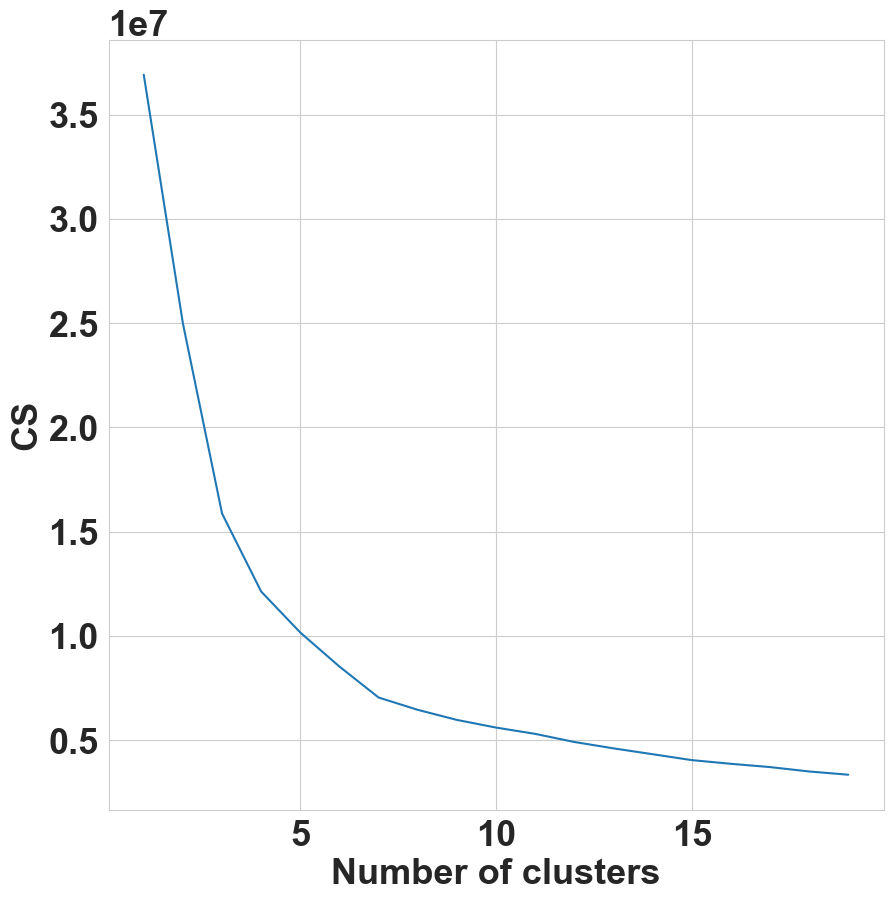

In [19]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

range_number = 20

cs = []
for i in range(1,range_number):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(clustering_df)
    cs.append(kmeans.inertia_)

ax.plot(range(1,range_number),cs)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('CS')
plt.show()

In [20]:
clustering = KMeans(n_clusters=7,random_state=0,n_init='auto')
clustering.fit(clustering_df)
print(clustering.cluster_centers_)
print(clustering.labels_)

[[2.65957447e-03 4.76661719e-02 2.56679861e-02 1.64110176e-02
  1.02898730e-01 5.11710374e-02 2.12353620e-03 6.53038925e-01
  3.61001155e-02 6.22629062e-02 6.80764473e+00 2.60021235e+01
  4.35943427e-01 1.60770246e-01 2.53030678e-01 1.50255649e-01
  3.54210993e+01 5.91578014e+00]
 [4.40843560e-03 5.53635966e-02 2.89526987e-02 1.82294769e-02
  1.15711506e-01 5.86997101e-02 2.28364907e-03 6.27407760e-01
  2.73640732e-02 6.15790937e-02 6.81589817e+00 6.26321538e+00
  4.24321856e-01 1.74669367e-01 2.63493387e-01 1.37515390e-01
  3.53785893e+01 5.92428214e+00]
 [1.30950043e-04 4.15111635e-02 2.63864336e-02 1.15890788e-02
  1.48497348e-01 5.17907418e-02 1.63687553e-03 6.39887383e-01
  2.90709094e-02 4.94991161e-02 6.67419629e+00 7.69259478e+00
  3.31696458e-01 8.11235514e-02 4.54331173e-01 1.32848818e-01
  1.79172396e+01 6.96935769e+00]
 [5.25455395e-04 6.30546474e-02 1.71648762e-02 2.11349837e-02
  1.56760859e-01 5.59901915e-02 2.21858944e-03 6.20270901e-01
  2.57473143e-02 3.71321812e-02 6

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


In [21]:
clustering_df_copy = clustering_df.copy()
clustering_df_copy['Cluster'] = clustering.labels_
print(clustering_df_copy)

        Blue - Large 4L - 5L  Charcoal - Large 4L - 5L  Gold - Large 4L  \
0                        0.0                       0.0              0.0   
1                        0.0                       0.0              0.0   
2                        0.0                       0.0              0.0   
3                        0.0                       0.0              0.0   
4                        0.0                       0.0              0.0   
...                      ...                       ...              ...   
215651                   0.0                       0.0              0.0   
215652                   0.0                       0.0              0.0   
215653                   0.0                       0.0              0.0   
215654                   0.0                       0.0              0.0   
215655                   0.0                       0.0              0.0   

        Mobil 1 Gold 4L - 6L  Mobil Delvac Modern 7L  Mobil Super AIO - 7L  \
0                    

<Axes: >

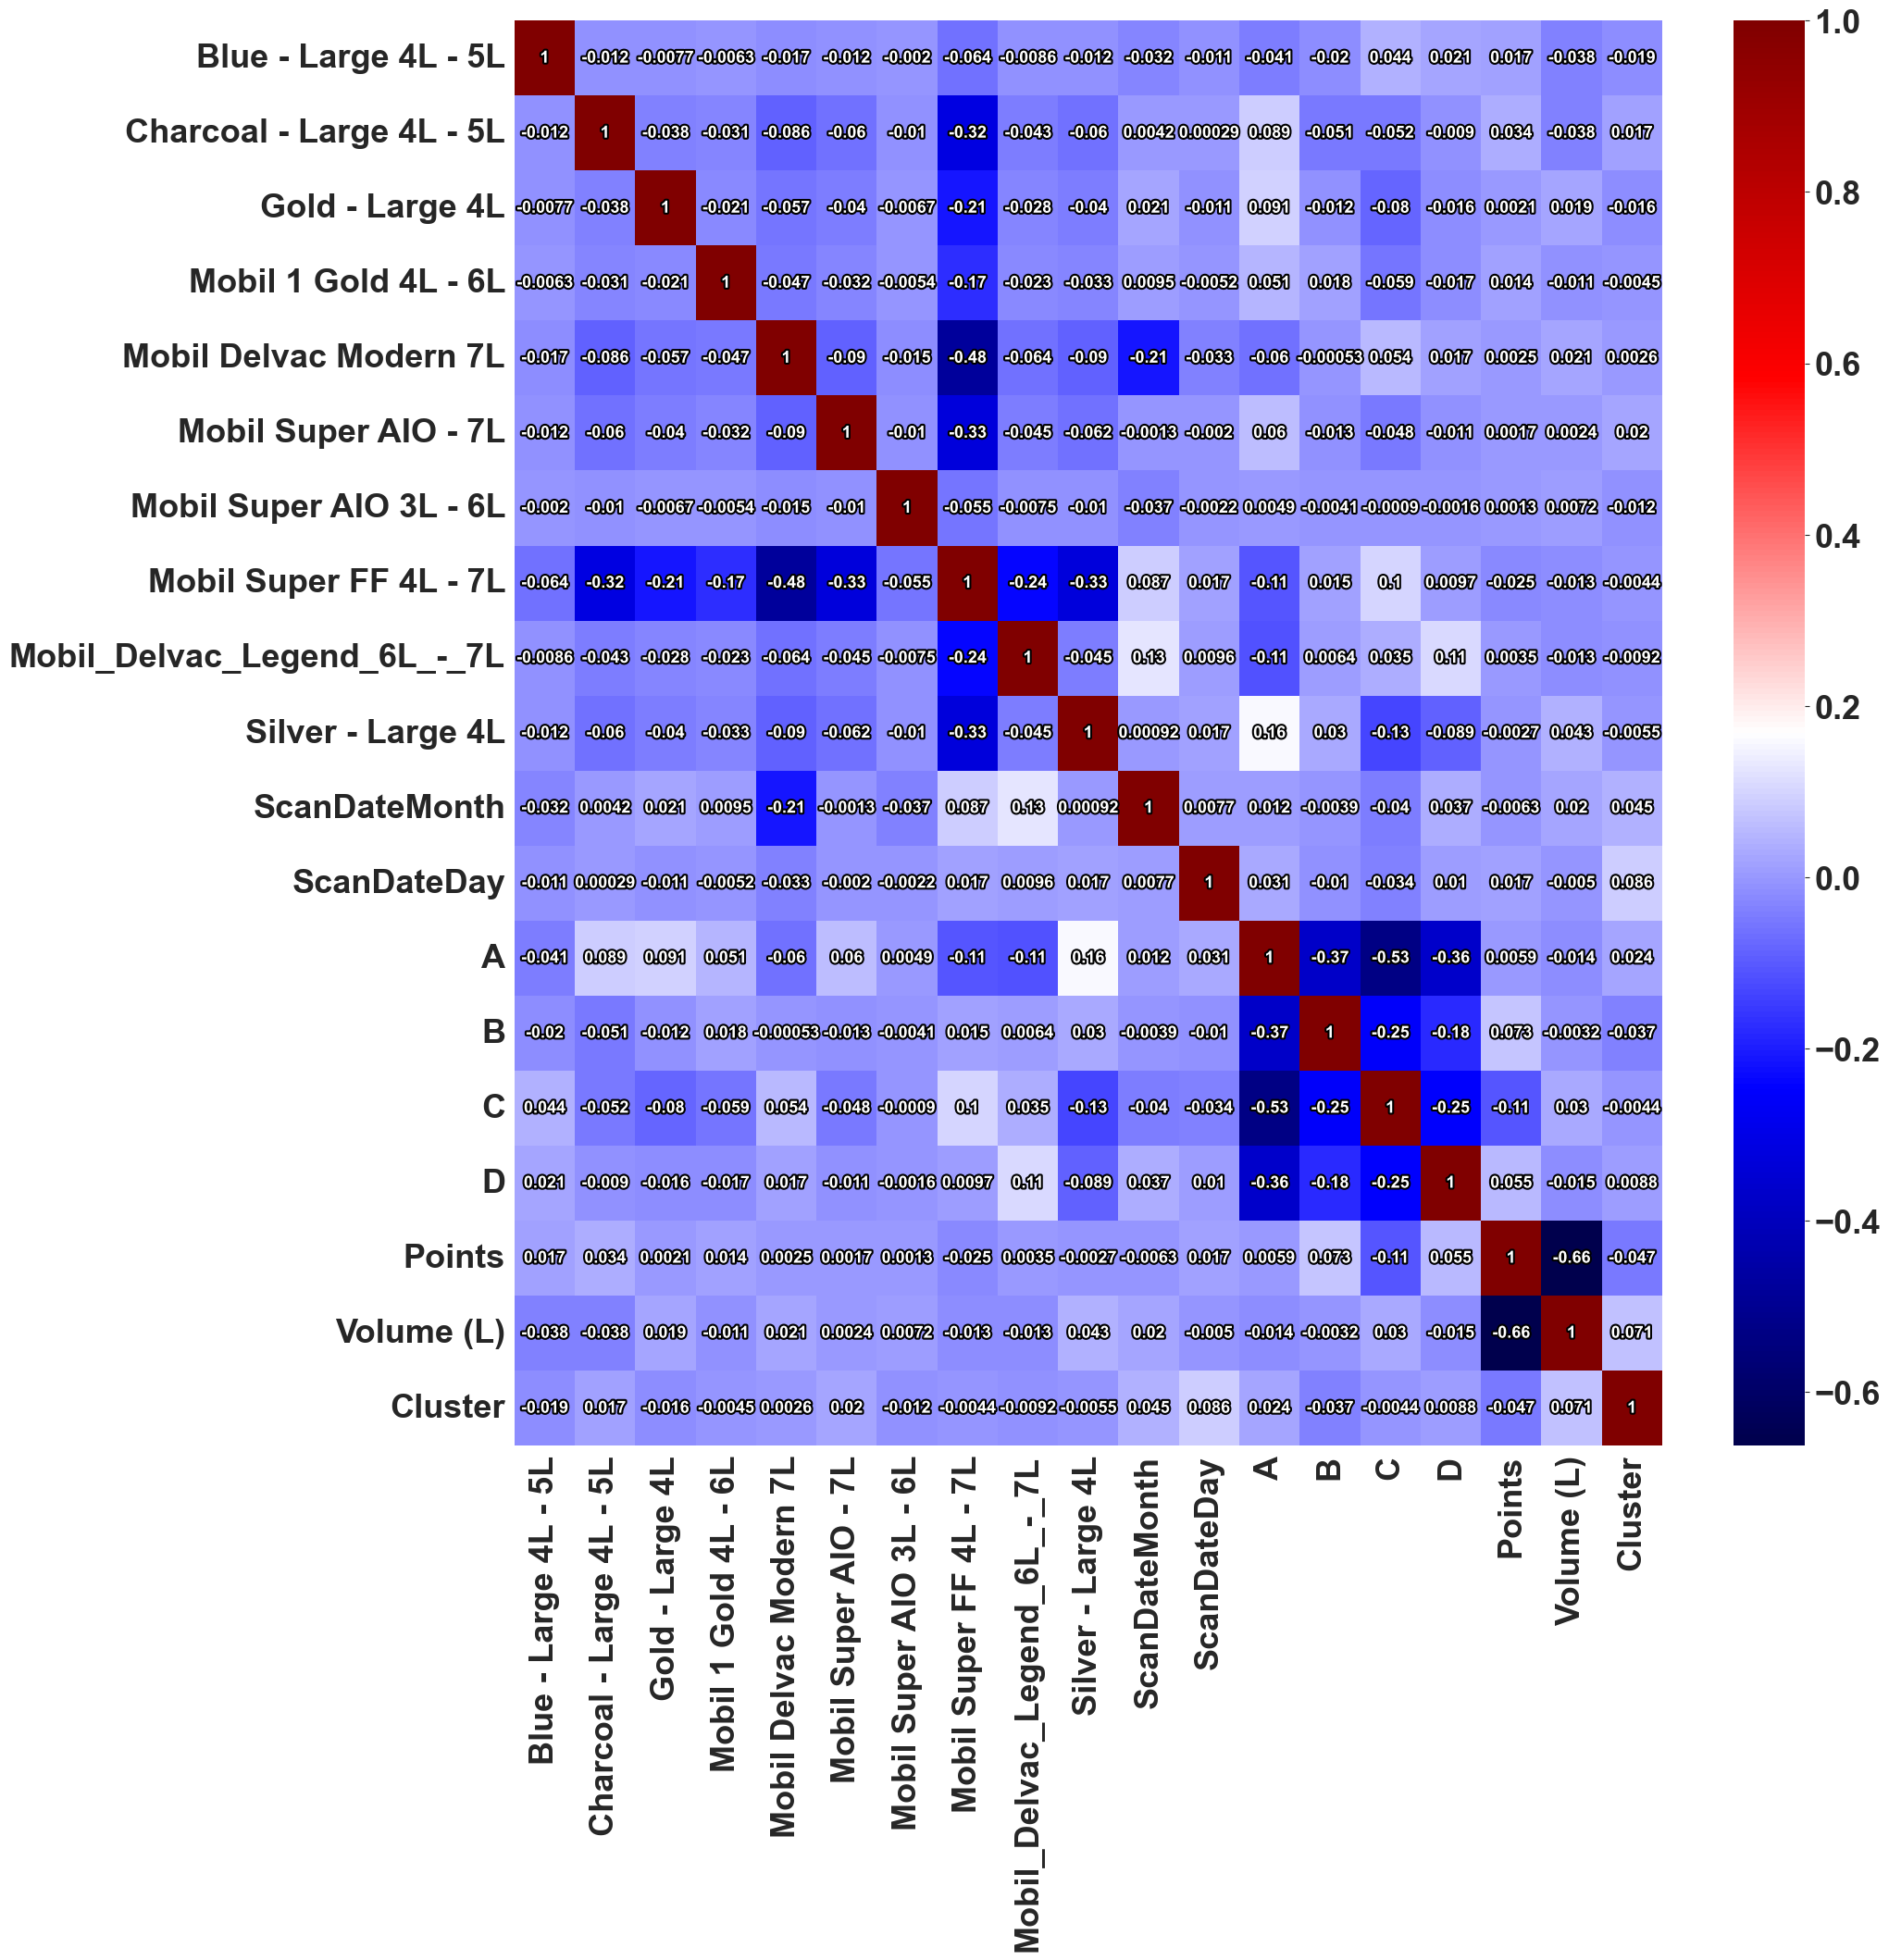

In [22]:
heatmap_fig = plt.figure(figsize=(20,20))
heatmap_ax = plt.subplot2grid((1,1),(0,0),fig=heatmap_fig)

corr_dataframe = clustering_df_copy.corr(method='pearson')
sns.heatmap(corr_dataframe,annot=True,ax=heatmap_ax,cmap='seismic',annot_kws={'fontsize':13,'path_effects':[matplotlib.patheffects.withStroke(linewidth=3,foreground='black')],'c':'white'})

In [23]:
# np.random.seed(1)

# heatmap_df_copy = clustering_df_copy[['A','B','C','D','Points','Volume (L)','Cluster']]

# pairplot_dataframe = heatmap_df_copy

# cmap = matplotlib.colormaps['brg'] # get cmap
# amount_of_colors = int((len(pairplot_dataframe.columns)**2))
# colors_list = [cmap(x/amount_of_colors) for x in range(amount_of_colors)] # get each range of cmap
# colors_iter = iter(colors_list)

# repeat_colors_list = []

# def kde_color(x,y,**kwargs):
#     kwargs['color'] = next(colors_iter)
#     repeat_colors_list.append(kwargs['color'])
#     sns.kdeplot(x=x,y=y,fill=True,levels=5,**kwargs)
#     plt.grid(which='major',color='black',linestyle='--',linewidth=1.5)

# def scatter_color(x,y,**kwargs):
#     kwargs['color'] = next(colors_iter)
#     sns.scatterplot(x=x,y=y,s=75,edgecolors='black',marker='^',**kwargs)
#     plt.grid(which='major',color='black',linestyle='--',linewidth=1.5)

# def hist_color(x,**kwargs):
#     kwargs['color'] = next(colors_iter)
#     plt.hist(x=x,**kwargs)
# #     plt.grid(which='majo4r',color='black',linestyle='--',linewidth=1.5)

# sns.set_context('paper',rc={'axes.labelsize':22,'xtick.labelsize':16,'ytick.labelsize':16})
# plot = sns.PairGrid(pairplot_dataframe,aspect=1)

# plot.map_diag(hist_color)
# # plot.map_offdiag(kde_color)

# repeat_colors_iter = iter(repeat_colors_list)

# plot.map_offdiag(scatter_color)

# for ax in plot.axes.flatten():

#     ax.spines[['right','top','bottom','left']].set_visible(True)
#     ax.spines[['right','top','bottom','left']].set_linewidth(2)

# plt.subplots_adjust(wspace=0,hspace=0)

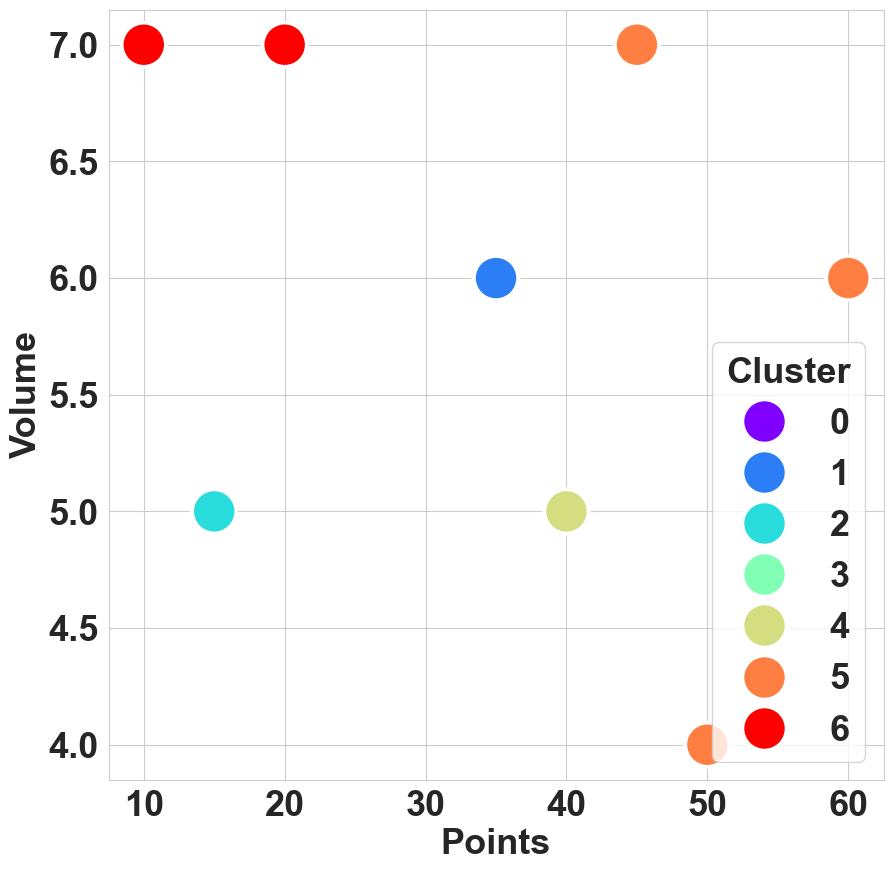

In [24]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

sns.scatterplot(data=clustering_df_copy,x='Points',y='Volume (L)',hue='Cluster',palette='rainbow',s=1000)

ax.set_xlabel('Points')
ax.set_ylabel('Volume')
plt.show()

Mobil Super AIO - 7L,45,7
Mobil 1 Gold 4L - 6L,60,6
Silver - Large 4L,50,4
Gold - Large 4L,50,4

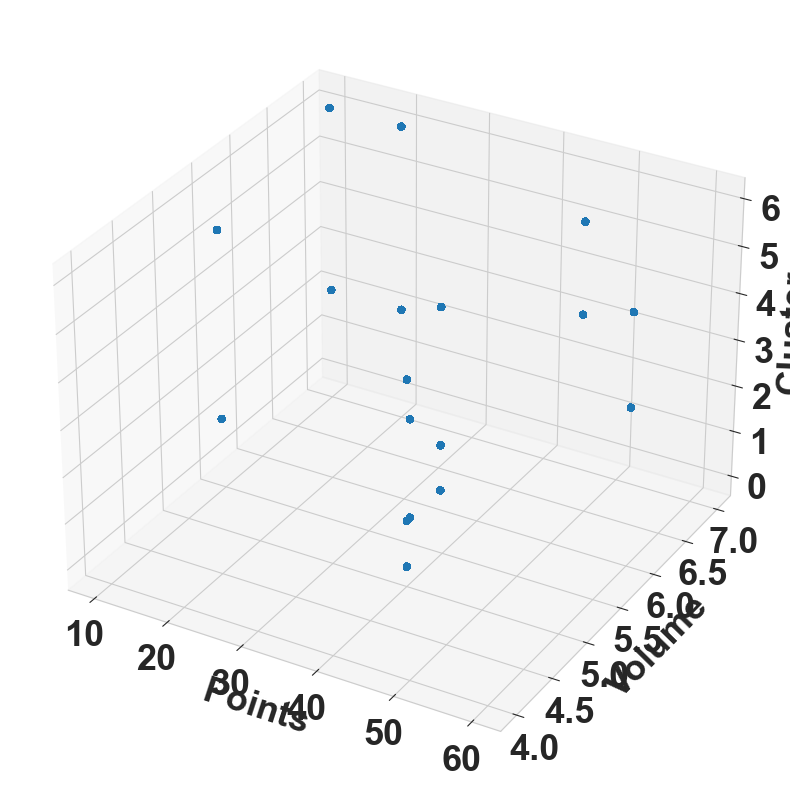

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=clustering_df_copy[['Points']],ys=clustering_df_copy[['Volume (L)']],zs=clustering_df_copy[['Cluster']])
ax.set_xlabel('Points')
ax.set_ylabel('Volume')
ax.set_zlabel('Cluster')
plt.show()

RFM

In [26]:
RFM_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\RFM_Customer_Analysis.csv")
# print(RFM_df.to_string())

clustering_RFM = KMeans(n_clusters=12,random_state=0,n_init='auto')
clustering_RFM.fit(RFM_df.drop(['UserId'],axis='columns'))
# print(clustering_RFM.cluster_centers_)
# print(clustering_RFM.labels_)

clustering_RFM_fitted_df = RFM_df.copy()
clustering_RFM_fitted_df['Cluster'] = clustering_RFM.labels_

user_ID_unique = transaction_df[['UserId']].value_counts().index.get_level_values(0).to_numpy().tolist()
user_ID_unique_values = transaction_df[['UserId']].value_counts().values.tolist()

user_ID_unique_values_dict = dict(zip(user_ID_unique,user_ID_unique_values))

print(user_ID_unique_values_dict)

RFM_plot_cluster_df = clustering_RFM_fitted_df.copy()

RFM_plot_cluster_df['Total Sales (x100)'] = RFM_plot_cluster_df['UserId'].apply(lambda x: user_ID_unique_values_dict.get(x)*10)

print(RFM_plot_cluster_df)

print(RFM_df.columns)

{'EXL_1616574618013': 2519, 'EXL_1691757071956': 2329, 'EXL_1571762407828': 2226, 'EXL_1672402052826': 2113, 'EXL_1570180752677': 2062, 'EXL_1580465142891': 1900, 'EXL_1570621002920': 1900, 'EXL_1584437471637': 1720, 'EXL_1591547024485': 1625, 'EXL_1576162236254': 1423, 'EXL_1570636969875': 1420, 'EXL_1570616881245': 1357, 'EXL_1591459235663': 1349, 'EXL_1607099084450': 1327, 'EXL_1571386589053': 1307, 'EXL_1570879267469': 1303, 'EXL_1570811002609': 1284, 'EXL_1576766962507': 1244, 'EXL_1574691069288': 1228, 'EXL_1570701225628': 1177, 'EXL_1571000517916': 1164, 'EXL_1572967356120': 1113, 'EXL_1573307216630': 1109, 'EXL_1577719199717': 1000, 'EXL_1571322486836': 998, 'EXL_1570269946302': 989, 'EXL_1654771506905': 967, 'EXL_1615135914398': 955, 'EXL_1573832916691': 936, 'EXL_1662807829883': 922, 'EXL_1653597905069': 922, 'EXL_1573742023737': 909, 'EXL_1570800163338': 882, 'EXL_1685097059139': 868, 'EXL_1636202798697': 861, 'EXL_1575038360405': 836, 'EXL_1655819592946': 832, 'EXL_15708842

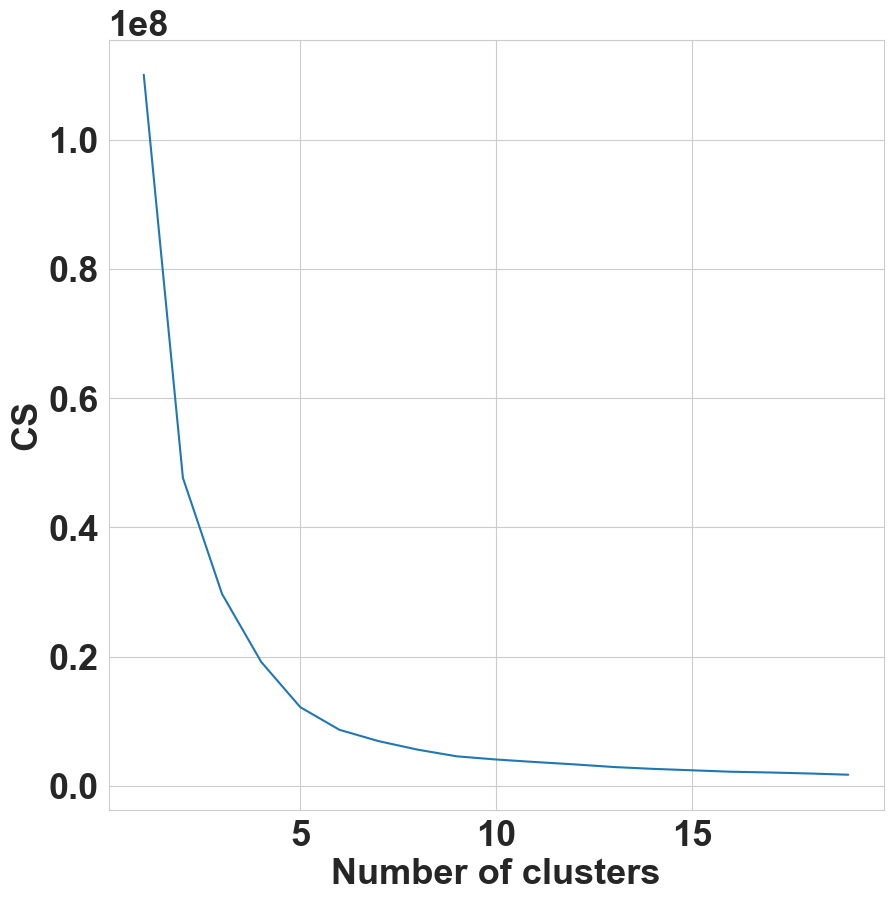

In [27]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

range_number = 20

cs = []
for i in range(1,range_number):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(RFM_df.drop(['UserId'],axis='columns'))
    cs.append(kmeans.inertia_)

ax.plot(range(1,range_number),cs)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('CS')
plt.show()

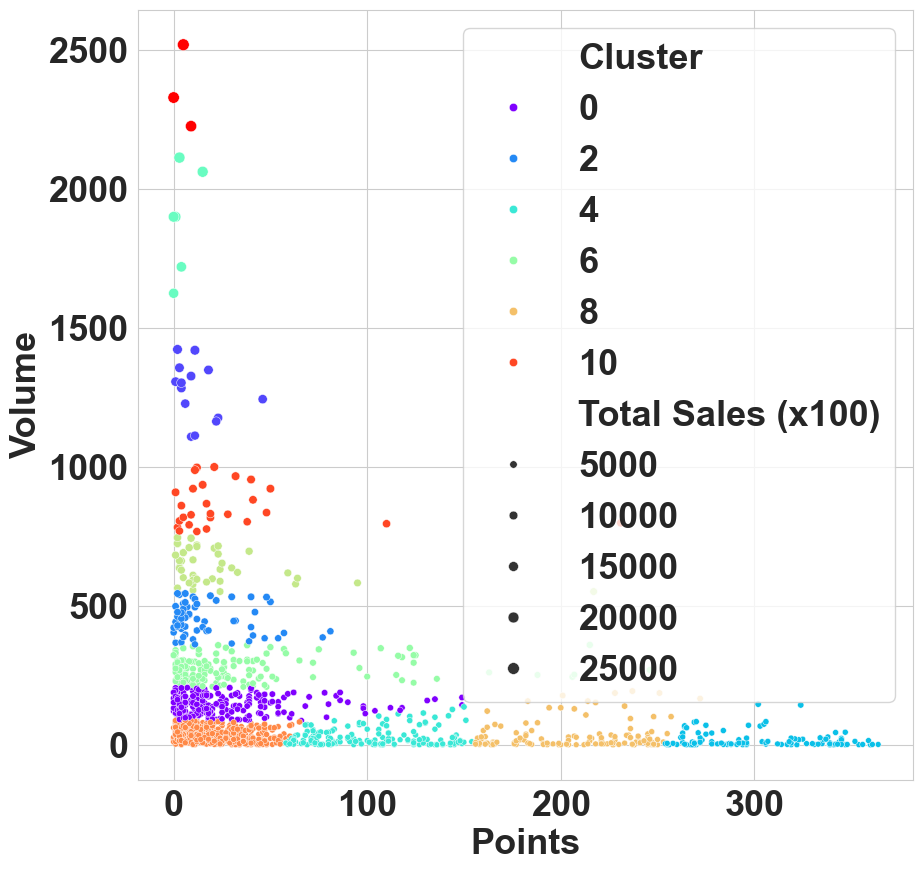

In [28]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

sns.scatterplot(data=RFM_plot_cluster_df,x='Days Since Last Visit',y='Lifetime Total Sale',hue='Cluster',palette='rainbow',size='Total Sales (x100)')

ax.set_xlabel('Points')
ax.set_ylabel('Volume')
plt.show()

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

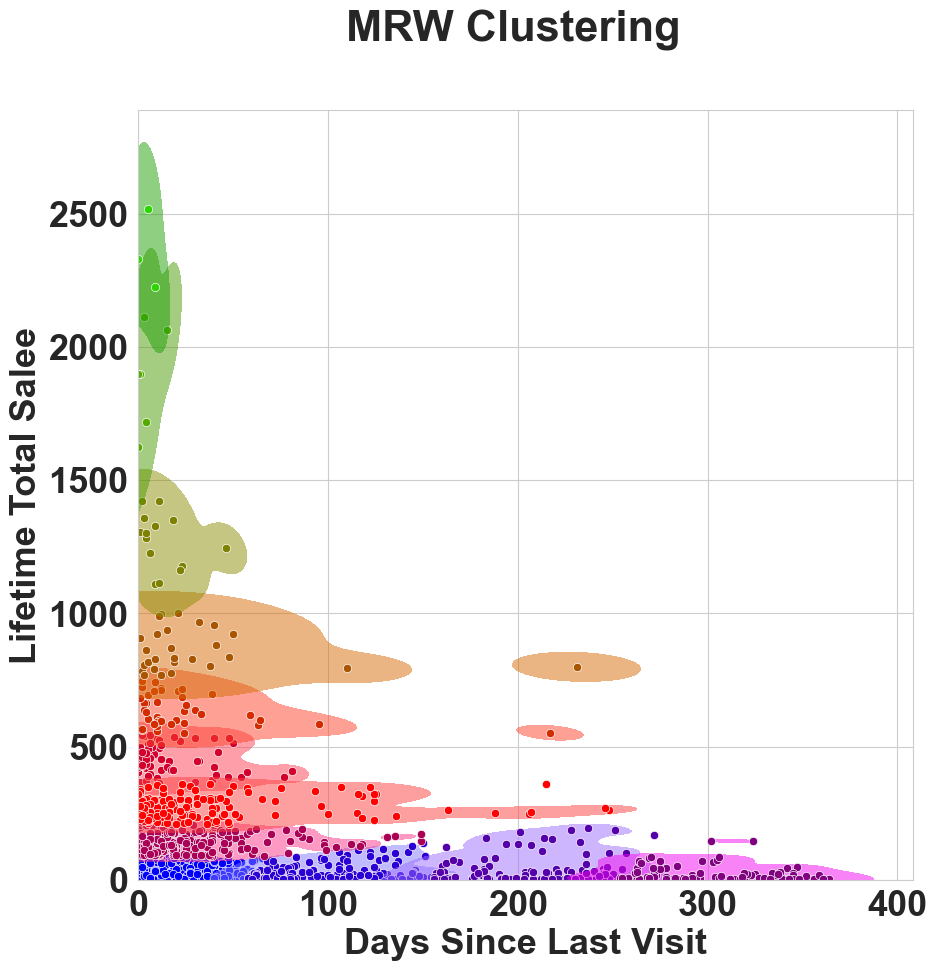

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

cmap = matplotlib.colormaps['brg'] # get cmap
amount_of_colors = int(len(RFM_plot_cluster_df['Cluster'].unique()))
colors_list = [cmap(x/amount_of_colors) for x in range(amount_of_colors)] # get each range of cmap

all_patches_list = []

# label_count_list = [
#     'NEW CUSTOMER',
#     'LOST CUSTOMER',
#     'LOW PROMISING',
#     'HIGH PROMISING',
#     'MED PROMISING',
#     'LOYAL',
#     'VERY LOYAL',
#     'CHAMPION'
# ]

for count,cluster in enumerate(RFM_plot_cluster_df['Cluster'].unique()):

    plot_df = RFM_plot_cluster_df[RFM_plot_cluster_df['Cluster'] == cluster]

    sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False,clip=((0.0,RFM_plot_cluster_df[['Days Since Last Visit']].max()[0]+200),(0.0,RFM_plot_cluster_df[['Lifetime Total Sale']].max()[0]+500)),levels=2,fill=True,alpha=0.5)
    sns.scatterplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

    # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

    # all_patches_list.append(matplotlib.patches.Patch(color=colors_list[count],label=label_count_list[count]))

# plt.legend(handles=all_patches_list)

fig.suptitle('MRW Clustering')

ax.set_xlabel('Days Since Last Visit')
ax.set_ylabel('Lifetime Total Salee')
plt.show()

In [30]:
MER_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\MER_RAW_Transaction2.csv")
MER_df = MER_df.drop(['New_Volume(L)','Point'],axis='columns')
print(MER_df)

     Invoicedate Distributor             GroupId     Type Provincename  \
0      07-Apr-23           A  ERW_AMBP2020110030  Retails      Bangkok   
1      27-Sep-23           A  ERW_AMBP2020110030  Retails      Bangkok   
2      28-Sep-23           A  ERW_AMBP2020110030  Retails      Bangkok   
3      27-Apr-23           A  ERW_AMBP2020110030  Retails      Bangkok   
4      29-Mar-23           A  ERW_AMBP2020110030  Retails      Bangkok   
...          ...         ...                 ...      ...          ...   
9424   11-Mar-23           C  ERW_C08P2020090135  Retails      Lampang   
9425   11-Mar-23           C  ERW_C08P2020090135  Retails      Lampang   
9426   02-Mar-23           C  ERW_C08P2020090138  Retails      Lamphun   
9427   01-Apr-23           C  ERW_C08P2020090138  Retails      Lamphun   
9428   11-Mar-23           C  ERW_C08P2020090135  Retails      Lampang   

       MatNo                             Material Name  Value (L)  Day  Month  
0     143160  MOBIL DELVAC SUPE

In [31]:
from sklearn.preprocessing import OneHotEncoder

interested_column_list = ['Distributor','Type','Provincename','MatNo']

feature_importance_df = pd.DataFrame()

for interested_column_string in interested_column_list:

    interested_column = MER_df[[interested_column_string]]
    transaction_encoder = OneHotEncoder()
    transaction_encoder.fit(interested_column)
    # print(transaction_encoder.categories_[0].tolist())
    encoded_column = transaction_encoder.transform(interested_column)
    # print(encoded_column)
    encoded_df = pd.DataFrame().sparse.from_spmatrix(encoded_column)
    encoded_df.columns = transaction_encoder.categories_[0].tolist()
    # print(encoded_df)
    feature_importance_df = pd.concat([encoded_df,feature_importance_df],axis='columns')

feature_importance_df['Value'] = MER_df[['Value (L)']]
feature_importance_df['Day'] = MER_df[['Day']]
feature_importance_df['Month'] = MER_df[['Month']]
print(feature_importance_df)

      123150  124213  124216  133405  134345  134346  134348  134349  134523  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9424     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9425     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9426     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9427     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9428     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      134525  ...  Yasothon  Reseller  

In [32]:
# font_size_plot = 13.5
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titleweight'] = 'bold'
# plt.rcParams['figure.labelweight'] = 'bold'
# plt.rcParams['figure.titleweight'] = 'bold'
# plt.rcParams['font.size'] = font_size_plot

# path = os.path.abspath('')
# os.chdir(f'{path}')

# from sklearn.tree import DecisionTreeRegressor

# number_of_trees_list = [100]

# feature_importance_df.columns = feature_importance_df.columns.astype(str)

# dataframe_feature = feature_importance_df.drop(['Value'],axis='columns')
# dataframe_target = feature_importance_df[['Value']]

# for number_of_trees in number_of_trees_list:

#     dataframe_overall_feature_importance = pd.DataFrame()

#     for state in range(number_of_trees):

#         decision_tree_model = DecisionTreeRegressor(random_state=state)
#         decision_tree_model.fit(dataframe_feature,dataframe_target)

#         dataframe_feature_importance = pd.DataFrame([decision_tree_model.feature_importances_],columns=[dataframe_feature.columns])
#         dataframe_feature_importance_copy = dataframe_feature_importance.copy()
#         most_important_features = dataframe_feature_importance_copy.notna()[dataframe_feature_importance_copy.notna() == True].dropna(axis='columns')

#         dataframe_most_important_features = pd.DataFrame()

#         for columns in most_important_features.columns:

#             temp_df = dataframe_feature_importance[[columns]]

#             if temp_df.values != 0:

#                 dataframe_most_important_features = pd.concat([temp_df,dataframe_most_important_features],axis='columns')

#         dataframe_overall_feature_importance = pd.concat([dataframe_overall_feature_importance,dataframe_most_important_features],axis='rows')

#     dataframe_overall_feature_importance = dataframe_overall_feature_importance.reset_index(drop=True)

#     mean_feature_importance = dataframe_overall_feature_importance.mean().sort_values()

#     dataframe_plot = mean_feature_importance.copy().to_frame().transpose()

#     fig = plt.figure(figsize=(40,20))
#     ax = plt.subplot2grid((1,1),(0,0),fig=fig)

#     fig.suptitle(f'Mean Feature Importance {number_of_trees} DT Models (Varying Random States)')

#     ax.tick_params(axis='x',rotation=90)
#     plt.grid(which='major',color='black',linestyle='-',axis='y')

#     ax.set_ylabel('Mean Feature Importance (a.u.)')

#     color_map = plt.get_cmap('gist_rainbow')
#     color_list = [tuple([x for x_count,x in enumerate(color_map(1*(value/len(dataframe_plot.columns)))) if x_count != 3]) for value in range(len(dataframe_plot.columns))]

#     x = dataframe_plot.columns.get_level_values(0).values.tolist()
#     y = dataframe_plot.loc[0].values.tolist()

#     ax.bar(x,y,color=color_list)

#     fig.tight_layout()

#     fig.savefig(f'Trees{number_of_trees}.jpg',dpi=fig.dpi)

#     plt.close()


DT

In [33]:
# # TOP

# font_size_plot = 13.5
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titleweight'] = 'bold'
# plt.rcParams['figure.labelweight'] = 'bold'
# plt.rcParams['figure.titleweight'] = 'bold'
# plt.rcParams['font.size'] = font_size_plot

# path = os.path.abspath('')
# os.chdir(f'{path}')

# from sklearn.tree import DecisionTreeRegressor

# chosen_feature = 25

# number_of_trees_list = [100]

# feature_importance_df.columns = feature_importance_df.columns.astype(str)

# print(feature_importance_df)

# dataframe_feature = feature_importance_df.drop(['Value'],axis='columns')
# dataframe_target = feature_importance_df[['Value']]

# for number_of_trees in number_of_trees_list:

#     dataframe_overall_feature_importance = pd.DataFrame()

#     for state in range(number_of_trees):

#         decision_tree_model = DecisionTreeRegressor(random_state=state)
#         decision_tree_model.fit(dataframe_feature,dataframe_target)

#         dataframe_feature_importance = pd.DataFrame([decision_tree_model.feature_importances_],columns=[dataframe_feature.columns])
#         dataframe_feature_importance_copy = dataframe_feature_importance.copy()
#         most_important_features = dataframe_feature_importance_copy.notna()[dataframe_feature_importance_copy.notna() == True].dropna(axis='columns')

#         dataframe_most_important_features = pd.DataFrame()

#         for columns in most_important_features.columns:

#             temp_df = dataframe_feature_importance[[columns]]

#             if temp_df.values != 0:

#                 dataframe_most_important_features = pd.concat([temp_df,dataframe_most_important_features],axis='columns')

#         dataframe_overall_feature_importance = pd.concat([dataframe_overall_feature_importance,dataframe_most_important_features],axis='rows')

#     dataframe_overall_feature_importance = dataframe_overall_feature_importance.reset_index(drop=True)

#     mean_feature_importance = dataframe_overall_feature_importance.mean().sort_values()

#     dataframe_plot = mean_feature_importance.copy().to_frame().transpose()

#     fig = plt.figure(figsize=(20,10))
#     ax = plt.subplot2grid((1,1),(0,0),fig=fig)

#     fig.suptitle(f'Top 25 Mean Feature Importance {number_of_trees} DT Models (Varying Random States)')

#     ax.tick_params(axis='x',rotation=90)
#     plt.grid(which='major',color='black',linestyle='-',axis='y')

#     ax.set_ylabel('Mean Feature Importance (a.u.)')

#     color_map = plt.get_cmap('gist_rainbow')
#     color_list = [tuple([x for x_count,x in enumerate(color_map(1*(value/chosen_feature))) if x_count != 3]) for value in range(chosen_feature)]

#     x = dataframe_plot.columns.get_level_values(0).values.tolist()
#     y = dataframe_plot.loc[0].values.tolist()

#     x = x[-(chosen_feature+1):-1]
#     y = y[-(chosen_feature+1):-1]

#     print(x[-(chosen_feature+1):-1])
#     print(y[-(chosen_feature+1):-1])

#     ax.bar(x,y,color=color_list)

#     fig.tight_layout()

#     fig.savefig(f'TopTrees{number_of_trees}.jpg',dpi=fig.dpi)

#     plt.close()

# # BOTTOM

# font_size_plot = 13.5
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titleweight'] = 'bold'
# plt.rcParams['figure.labelweight'] = 'bold'
# plt.rcParams['figure.titleweight'] = 'bold'
# plt.rcParams['font.size'] = font_size_plot

# path = os.path.abspath('')
# os.chdir(f'{path}')

# from sklearn.tree import DecisionTreeRegressor

# chosen_feature = 25

# number_of_trees_list = [100]

# feature_importance_df.columns = feature_importance_df.columns.astype(str)

# dataframe_feature = feature_importance_df.drop(['Value'],axis='columns')
# dataframe_target = feature_importance_df[['Value']]

# for number_of_trees in number_of_trees_list:

#     dataframe_overall_feature_importance = pd.DataFrame()

#     for state in range(number_of_trees):

#         decision_tree_model = DecisionTreeRegressor(random_state=state)
#         decision_tree_model.fit(dataframe_feature,dataframe_target)

#         dataframe_feature_importance = pd.DataFrame([decision_tree_model.feature_importances_],columns=[dataframe_feature.columns])
#         dataframe_feature_importance_copy = dataframe_feature_importance.copy()
#         most_important_features = dataframe_feature_importance_copy.notna()[dataframe_feature_importance_copy.notna() == True].dropna(axis='columns')

#         dataframe_most_important_features = pd.DataFrame()

#         for columns in most_important_features.columns:

#             temp_df = dataframe_feature_importance[[columns]]

#             if temp_df.values != 0:

#                 dataframe_most_important_features = pd.concat([temp_df,dataframe_most_important_features],axis='columns')

#         dataframe_overall_feature_importance = pd.concat([dataframe_overall_feature_importance,dataframe_most_important_features],axis='rows')

#     dataframe_overall_feature_importance = dataframe_overall_feature_importance.reset_index(drop=True)

#     mean_feature_importance = dataframe_overall_feature_importance.mean().sort_values()

#     dataframe_plot = mean_feature_importance.copy().to_frame().transpose()

#     fig = plt.figure(figsize=(20,10))
#     ax = plt.subplot2grid((1,1),(0,0),fig=fig)

#     fig.suptitle(f'Bottom 25 Mean Feature Importance {number_of_trees} DT Models (Varying Random States)')

#     ax.tick_params(axis='x',rotation=90)
#     plt.grid(which='major',color='black',linestyle='-',axis='y')

#     ax.set_ylabel('Mean Feature Importance (a.u.)')

#     color_map = plt.get_cmap('gist_rainbow')
#     color_list = [tuple([x for x_count,x in enumerate(color_map(1*(value/chosen_feature))) if x_count != 3]) for value in range(chosen_feature)]

#     x = dataframe_plot.columns.get_level_values(0).values.tolist()
#     y = dataframe_plot.loc[0].values.tolist()

#     x.reverse()
#     y.reverse()

#     x = x[-(chosen_feature+1):-1]
#     y = y[-(chosen_feature+1):-1]

#     print(x[-(chosen_feature+1):-1])
#     print(y[-(chosen_feature+1):-1])

#     x.reverse()
#     y.reverse()

#     ax.bar(x,y,color=color_list)

#     fig.tight_layout()

#     fig.savefig(f'BottomTrees{number_of_trees}.jpg',dpi=fig.dpi)

#     plt.close()


                GroupId Lifetime Total Sale  Days Since Last Visit  \
0    ERW_AMBP2020110207           2,128,810                      6   
1    ERW_AMBP2020110291             684,099                      9   
2    ERW_BM2U2020110053           1,779,038                      2   
3    ERW_C08P2020090096             198,196                     31   
4    ERW_BM2U2020110177           1,764,398                      0   
..                  ...                 ...                    ...   
632  ERW_AMBP2020110762              10,968                    102   
633  ERW_C08P2020090018              12,180                    218   
634  ERW_C08P2020090132               5,304                     99   
635  ERW_C9H62020120015               2,460                    135   
636  ERW_C08P2020090203              35,814                      4   

    Total Visit per Month  R score  F score  M score  
0              193,528.18        5        5        5  
1               62,190.82        5        5      

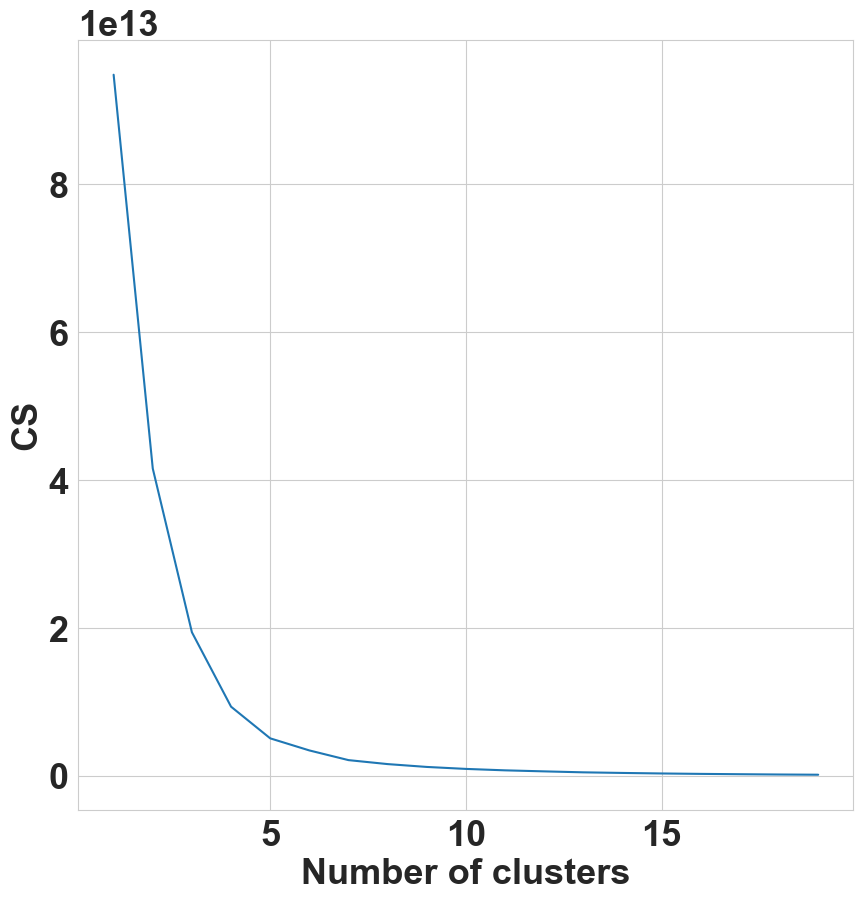

[[3.11001470e+05 4.01742424e+01 2.82728609e+04 3.71969697e+00
  5.00000000e+00 4.65151515e+00]
 [1.81267192e+06 5.41666667e+00 1.64788357e+05 5.00000000e+00
  5.00000000e+00 5.00000000e+00]
 [6.02369500e+06 6.00000000e+00 5.47608640e+05 5.00000000e+00
  5.00000000e+00 5.00000000e+00]
 [5.62592678e+04 1.01278618e+02 5.11447886e+03 2.68034557e+00
  4.96328294e+00 2.34773218e+00]
 [8.63222000e+05 1.06551724e+01 7.84747286e+04 4.65517241e+00
  5.00000000e+00 5.00000000e+00]]
[1 4 1 0 1 3 3 3 0 4 1 3 3 0 3 3 0 1 0 4 3 0 2 4 3 3 4 0 0 0 0 3 0 0 1 1 3
 3 0 3 3 3 3 3 3 0 3 3 3 3 3 4 4 0 0 0 0 0 3 0 0 3 3 0 3 0 0 3 3 3 0 0 3 0
 3 0 4 3 3 3 3 4 0 3 0 3 3 0 3 3 4 0 0 3 0 3 3 0 3 4 3 3 3 0 0 4 4 3 4 4 0
 0 0 1 0 0 4 3 3 0 3 3 0 0 0 3 0 0 1 3 3 3 0 3 3 3 0 3 4 3 3 0 0 3 3 3 4 3
 3 0 0 3 3 3 3 3 0 3 1 3 3 3 3 0 4 3 3 4 0 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3
 3 0 3 0 3 0 0 3 3 3 0 3 3 4 3 3 0 3 3 3 3 3 3 0 3 0 4 0 4 0 3 0 0 3 4 3 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 3 0 3 3 3 3 3 1 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 3

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

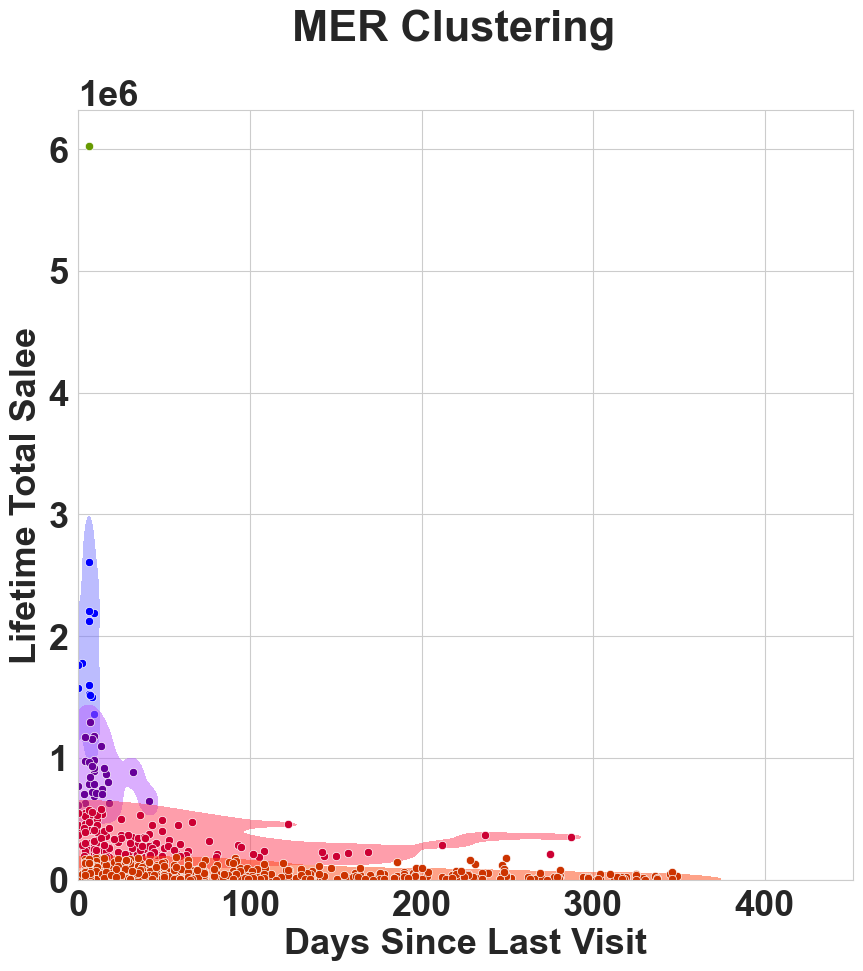

Index(['GroupId', 'Lifetime Total Sale', 'Days Since Last Visit',
       'Total Visit per Month', 'R score', 'F score', 'M score', 'Cluster'],
      dtype='object')


In [34]:
from sklearn.cluster import KMeans

RFM_MER_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\RFM_MER.csv")
print(RFM_MER_df)

RFM_MER_df['Lifetime Total Sale'] = RFM_MER_df['Lifetime Total Sale'].map(lambda x:float(x.replace(',','')))
RFM_MER_df['Total Visit per Month'] = RFM_MER_df['Total Visit per Month'].map(lambda x:float(x.replace(',','')))

print(RFM_MER_df)

# ELBOW

fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

range_number = 20

cs = []
for i in range(1,range_number):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(RFM_MER_df.drop(['GroupId'],axis='columns'))
    cs.append(kmeans.inertia_)

ax.plot(range(1,range_number),cs)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('CS')
plt.show()

# MODEL

clustering_RFM = KMeans(n_clusters=5,random_state=0,n_init='auto')
clustering_RFM.fit(RFM_MER_df.drop(['GroupId'],axis='columns'))
print(clustering_RFM.cluster_centers_)
print(clustering_RFM.labels_)

RFM_MER_df['Cluster'] = clustering_RFM.labels_

print(RFM_MER_df)

# clustering_RFM_fitted_df = RFM_MER_df.copy()
# clustering_RFM_fitted_df['Cluster'] = clustering_RFM.labels_

# user_ID_unique = transaction_df[['UserId']].value_counts().index.get_level_values(0).to_numpy().tolist()
# user_ID_unique_values = transaction_df[['UserId']].value_counts().values.tolist()

# user_ID_unique_values_dict = dict(zip(user_ID_unique,user_ID_unique_values))

# print(user_ID_unique_values_dict)

# RFM_plot_cluster_df = clustering_RFM_fitted_df.copy()

# RFM_plot_cluster_df['Total Sales (x100)'] = RFM_plot_cluster_df['UserId'].apply(lambda x: user_ID_unique_values_dict.get(x)*10)

# print(RFM_plot_cluster_df)

# PLOT

fig = plt.figure(figsize=(10,10))
ax = plt.subplot2grid((1,1),(0,0),fig=fig)

cmap = matplotlib.colormaps['brg'] # get cmap
amount_of_colors = int(len(RFM_MER_df['Cluster'].unique()))
colors_list = [cmap(x/amount_of_colors) for x in range(amount_of_colors)] # get each range of cmap

for count,cluster in enumerate(RFM_MER_df['Cluster'].unique()):

    plot_df = RFM_MER_df[RFM_MER_df['Cluster'] == cluster]

    # sns.scatterplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],size='Lifetime Total Sale',legend=False)
    # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False,clip=((0.0,RFM_MER_df[['Days Since Last Visit']].max()[0]+200),(0.0,RFM_MER_df[['Lifetime Total Sale']].max()[0]+200)))
    # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

    sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False,clip=((0.0,RFM_MER_df[['Days Since Last Visit']].max()[0]+200),(0.0,RFM_MER_df[['Lifetime Total Sale']].max()[0]+500)),levels=2,fill=True,alpha=0.5)
    sns.scatterplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

fig.suptitle('MER Clustering')

ax.set_xlabel('Days Since Last Visit')
ax.set_ylabel('Lifetime Total Salee')
plt.show()

print(RFM_MER_df.columns)

In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS

import time

clustering_algo_list = [KMeans,DBSCAN,Birch]
clustering_algo_name_list = ['KMeans','DBSCAN','Birch']

clustering_algo_df = pd.DataFrame() 

for count,clustering_algo in enumerate(clustering_algo_list):

    start_time = time.time()

    clustering = clustering_algo()
    clustering.fit(clustering_df)

    end_time = time.time()

    print(f'Done Algo {count}')
    print(f'Time {end_time - start_time:.2f}')

    temp_df = pd.DataFrame([[clustering_algo_name_list[count],end_time - start_time]],columns=['MODEL','TIME'])

    clustering_algo_df = pd.concat([temp_df,clustering_algo_df],axis='rows')
    print(clustering_algo_df)

clustering_algo_df.to_csv('CLUSTERING ALGO TIME.csv',index=False)

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Done Algo 0
Time 1.56
    MODEL      TIME
0  KMeans  1.562035


pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


Done Algo 1
Time 27.47
    MODEL       TIME
0  DBSCAN  27.466604
0  KMeans   1.562035


pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


Done Algo 2
Time 35.02
    MODEL       TIME
0   Birch  35.023539
0  DBSCAN  27.466604
0  KMeans   1.562035


pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


KeyboardInterrupt: 

In [ ]:
# from sklearn.cluster import DBSCAN

# eps_val_list = [1,5,50,100,500,1000]

# for eps_val in eps_val_list:

#     print(eps_val)

#     RFM_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\RFM_Customer_Analysis.csv")
#     # print(RFM_df.to_string())

#     clustering_RFM = DBSCAN(eps=eps_val,min_samples=2)
#     clustering_RFM.fit(RFM_df.drop(['UserId'],axis='columns'))
#     # print(clustering_RFM.cluster_centers_)
#     # print(clustering_RFM.labels_)

#     clustering_RFM_fitted_df = RFM_df.copy()
#     clustering_RFM_fitted_df['Cluster'] = clustering_RFM.labels_

#     user_ID_unique = transaction_df[['UserId']].value_counts().index.get_level_values(0).to_numpy().tolist()
#     user_ID_unique_values = transaction_df[['UserId']].value_counts().values.tolist()

#     user_ID_unique_values_dict = dict(zip(user_ID_unique,user_ID_unique_values))

#     RFM_plot_cluster_df = clustering_RFM_fitted_df.copy()

#     RFM_plot_cluster_df['Total Sales (x100)'] = RFM_plot_cluster_df['UserId'].apply(lambda x: user_ID_unique_values_dict.get(x)*10)

#     fig = plt.figure(figsize=(10,10))
#     ax = plt.subplot2grid((1,1),(0,0),fig=fig)

#     cmap = matplotlib.colormaps['brg'] # get cmap
#     amount_of_colors = int(len(RFM_plot_cluster_df['Cluster'].unique()))
#     colors_list = [cmap(x/amount_of_colors) for x in range(amount_of_colors)] # get each range of cmap

#     all_patches_list = []

#     # label_count_list = [
#     #     'NEW CUSTOMER',
#     #     'LOST CUSTOMER',
#     #     'LOW PROMISING',
#     #     'HIGH PROMISING',
#     #     'MED PROMISING',
#     #     'LOYAL',
#     #     'VERY LOYAL',
#     #     'CHAMPION'
#     # ]

#     for count,cluster in enumerate(RFM_plot_cluster_df['Cluster'].unique()):

#         plot_df = RFM_plot_cluster_df[RFM_plot_cluster_df['Cluster'] == cluster]

#         # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False,clip=((0.0,RFM_plot_cluster_df[['Days Since Last Visit']].max()[0]+200),(0.0,RFM_plot_cluster_df[['Lifetime Total Sale']].max()[0]+500)),levels=2)
#         sns.scatterplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

#         # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

#         # all_patches_list.append(matplotlib.patches.Patch(color=colors_list[count],label=label_count_list[count]))

#     # plt.legend(handles=all_patches_list)

#     fig.suptitle('MRW Clustering')

#     ax.set_xlabel('Days Since Last Visit')
#     ax.set_ylabel('Lifetime Total Salee')
#     plt.show()

# min_sam_val_list = [1,5,50,100,500,1000]

# for min_sam in min_sam_val_list:

#     print(min_sam)

#     RFM_df = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\EXXON Bootcathon\\True Work\\Data\\RFM_Customer_Analysis.csv")
#     # print(RFM_df.to_string())

#     clustering_RFM = DBSCAN(eps=5,min_samples=min_sam)
#     clustering_RFM.fit(RFM_df.drop(['UserId'],axis='columns'))
#     # print(clustering_RFM.cluster_centers_)
#     # print(clustering_RFM.labels_)

#     clustering_RFM_fitted_df = RFM_df.copy()
#     clustering_RFM_fitted_df['Cluster'] = clustering_RFM.labels_

#     user_ID_unique = transaction_df[['UserId']].value_counts().index.get_level_values(0).to_numpy().tolist()
#     user_ID_unique_values = transaction_df[['UserId']].value_counts().values.tolist()

#     user_ID_unique_values_dict = dict(zip(user_ID_unique,user_ID_unique_values))

#     RFM_plot_cluster_df = clustering_RFM_fitted_df.copy()

#     RFM_plot_cluster_df['Total Sales (x100)'] = RFM_plot_cluster_df['UserId'].apply(lambda x: user_ID_unique_values_dict.get(x)*10)

#     fig = plt.figure(figsize=(10,10))
#     ax = plt.subplot2grid((1,1),(0,0),fig=fig)

#     cmap = matplotlib.colormaps['brg'] # get cmap
#     amount_of_colors = int(len(RFM_plot_cluster_df['Cluster'].unique()))
#     colors_list = [cmap(x/amount_of_colors) for x in range(amount_of_colors)] # get each range of cmap

#     all_patches_list = []

#     # label_count_list = [
#     #     'NEW CUSTOMER',
#     #     'LOST CUSTOMER',
#     #     'LOW PROMISING',
#     #     'HIGH PROMISING',
#     #     'MED PROMISING',
#     #     'LOYAL',
#     #     'VERY LOYAL',
#     #     'CHAMPION'
#     # ]

#     for count,cluster in enumerate(RFM_plot_cluster_df['Cluster'].unique()):

#         plot_df = RFM_plot_cluster_df[RFM_plot_cluster_df['Cluster'] == cluster]

#         # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False,clip=((0.0,RFM_plot_cluster_df[['Days Since Last Visit']].max()[0]+200),(0.0,RFM_plot_cluster_df[['Lifetime Total Sale']].max()[0]+500)),levels=2)
#         sns.scatterplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

#         # sns.kdeplot(data=plot_df,x='Days Since Last Visit',y='Lifetime Total Sale',color=colors_list[count],legend=False)

#         # all_patches_list.append(matplotlib.patches.Patch(color=colors_list[count],label=label_count_list[count]))

#     # plt.legend(handles=all_patches_list)

#     fig.suptitle('MRW Clustering')

#     ax.set_xlabel('Days Since Last Visit')
#     ax.set_ylabel('Lifetime Total Salee')
#     plt.show()
